In [101]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# 1. Linear Classifier

In [102]:
# Download the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape,'\n')

# Classes
K = len(np.unique(y_train)) 

# Data Parameters
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# Covert labels to binary classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Reshape the data
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train reshaped:', x_train.shape)
print('y_train reshaped:',y_train.shape)
print('x_test reshaped:',x_test.shape)
print('y_test reshaped:',y_test.shape)


x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1) 

x_train reshaped: (50000, 3072)
y_train reshaped: (50000, 10)
x_test reshaped: (10000, 3072)
y_test reshaped: (10000, 10)


In [103]:
# Initialize weights
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros((1,K))
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

# Initialize parameters for linear model
iterations = 300
lr = 0.014
lr_decay = 0.999
reg = 5e-6 # Regularization parameter - Lambda

# Initialize lists to store history
loss_history = []
loss_history_test = []
train_acc_history = []
val_acc_history = []

w1: (3072, 10)
b1: (1, 10)


### Functions - Linear Model

In [104]:
def LinearLoss(y_p,Y,w1,reg,w2=0):
    # Calculates loss using the mean sum of squared errors
    dy = y_p - Y # Difference
    batch_size = y_p.shape[0]
    return (1/batch_size)*np.sum(np.square(dy)) + np.sum(w1**2)*reg + np.sum(w2**2)*reg

In [105]:
def ForwardProp(X,w1,b1):
    # Implements the forward pass of the linear model
    return np.matmul(X,w1)+b1

In [106]:
def BackProp(X,Y,y_p,nn,w_1,w_2=0,h=0):
    # Calculates dw1 and db1
    if nn:
        dy = 2*(y_p-Y)/Y.shape[0] # Derivative
        db2 = np.sum(dy,axis=0)
        dw2 = np.matmul(h.T,dy) + 2*w_2*reg
        dh = np.matmul(dy,w_2.T)
        db1 = np.sum(dh*h*(1-h),axis=0)
        dw1 = np.matmul(X.T,dh*h*(1-h)) + 2*w_1*reg
        return dw1,db1,dw2,db2

    else:
        dy = 2*(y_p-Y)/X.shape[0]# Derivative
        dw = np.matmul(X.T,dy)+2*w_1*reg  ; db = np.sum(dy,axis=0)
        return dw,db

In [107]:
def GradDescent(w1,b1,dw,db,lr,lr_decay):
    # Updates weights and learning rate
    w1 -= dw*lr ;  b1 -= db*lr ; lr *= lr_decay
    return w1,b1,lr

In [108]:
def Accuracy(Y,y_p):
    # Returns a similarity figure of accuracy
    y_p_in = np.argmax(y_p,axis=1)
    y_class = np.argmax(Y,axis=1)
    return np.sum(y_p_in==y_class)*100/y_class.size

In [109]:
# Implement linear classification

seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(1,iterations+1):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    
    # Forward pass
    X = x_train[indices]
    Y = y_train[indices]
    
    y_p = ForwardProp(X,w1,b1)

    # Calculate training loss for each iteration
    loss = LinearLoss(y_p,Y,w1,reg)

    if not(t%10):print('Iteration :',t,'---------- loss',loss)
    
    # Test set -----------------------------------------------
    y_pt = ForwardProp(x_test,w1,b1)

    # Calculate test loss for each iteration
    loss_t = LinearLoss(y_pt,y_test,w1,reg)
    # --------------------------------------------------------

    # Update history
    loss_history.append(loss)
    loss_history_test.append(loss_t)
    train_acc_history.append(Accuracy(Y,y_p))
    val_acc_history.append(Accuracy(y_test,y_pt))

    # Backward pass
    dw,db = BackProp(X,Y,y_p,False,w1)

    # Perform Gradient Descent
    w1,b1,lr = GradDescent(w1,b1,dw,db,lr,lr_decay)


Iteration : 10 ---------- loss 0.8815356397716624
Iteration : 20 ---------- loss 0.8450775421078545
Iteration : 30 ---------- loss 0.8250838088313739
Iteration : 40 ---------- loss 0.8132785735088148
Iteration : 50 ---------- loss 0.8059896232919972
Iteration : 60 ---------- loss 0.8012800307185782
Iteration : 70 ---------- loss 0.7980830628008193
Iteration : 80 ---------- loss 0.7957977316093126
Iteration : 90 ---------- loss 0.7940790158394506
Iteration : 100 ---------- loss 0.7927250650748491
Iteration : 110 ---------- loss 0.7916153252525872
Iteration : 120 ---------- loss 0.7906760846706035
Iteration : 130 ---------- loss 0.7898610375767912
Iteration : 140 ---------- loss 0.789140184078963
Iteration : 150 ---------- loss 0.788493412287801
Iteration : 160 ---------- loss 0.7879067391265655
Iteration : 170 ---------- loss 0.7873700768870292
Iteration : 180 ---------- loss 0.7868758848645386
Iteration : 190 ---------- loss 0.7864183402952851
Iteration : 200 ---------- loss 0.78599281

In [114]:
# Printing accuracies and losses

print("Learning Rate:", lr)
print("Training Set Loss:", loss_history[-1])
print("Test Set Loss:", loss_history_test[-1])
print("Train Accuracy:",train_acc_history[-1])
print("Test Accuracy:",val_acc_history[-1])

Learning Rate: 0.014
Training Set Loss: 0.7829011373995894
Test Set Loss: 0.7876170880328413
Train Accuracy: 41.932
Test Accuracy: 40.58


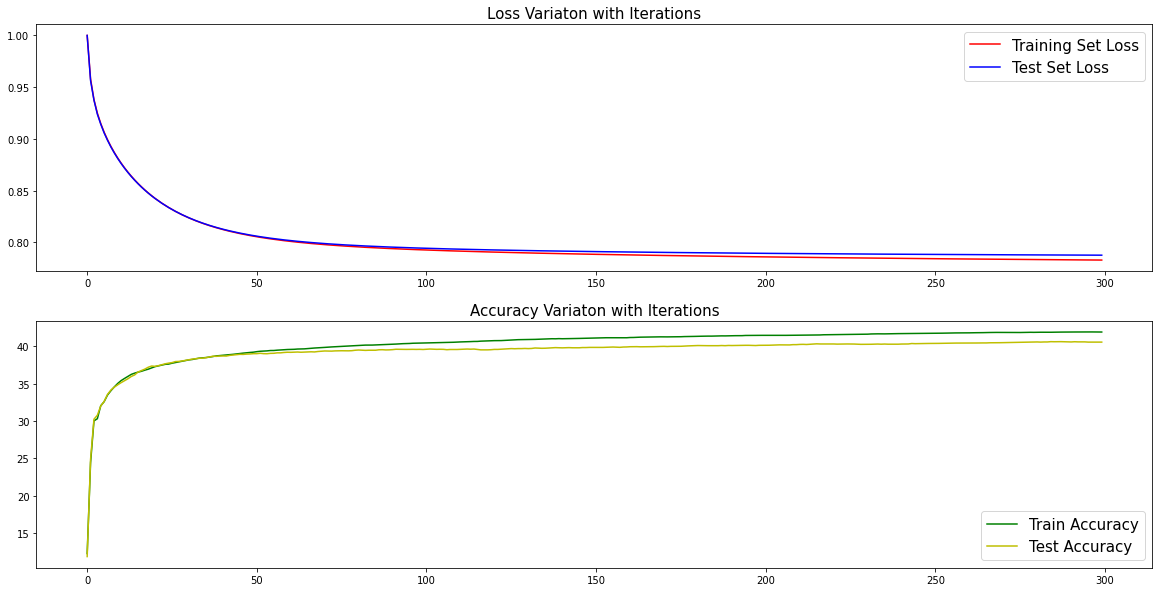

In [115]:
# Visualizing the loss/accuracy variation over iterations

fig,ax = plt.subplots(2,1,figsize=(20,10))

ax[0].plot(loss_history,color="r")
ax[0].plot(loss_history_test,color="b")
ax[0].set_title('Loss Variaton with Iterations',fontsize= 15)
ax[0].legend(['Training Set Loss','Test Set Loss'],fontsize= 15)

ax[1].plot(train_acc_history,color="g")
ax[1].plot(val_acc_history,color="y")
ax[1].set_title('Accuracy Variaton with Iterations',fontsize= 15)
ax[1].legend(['Train Accuracy','Test Accuracy'],fontsize= 15)

plt.savefig("Img_a4/LinearHistory.tif")

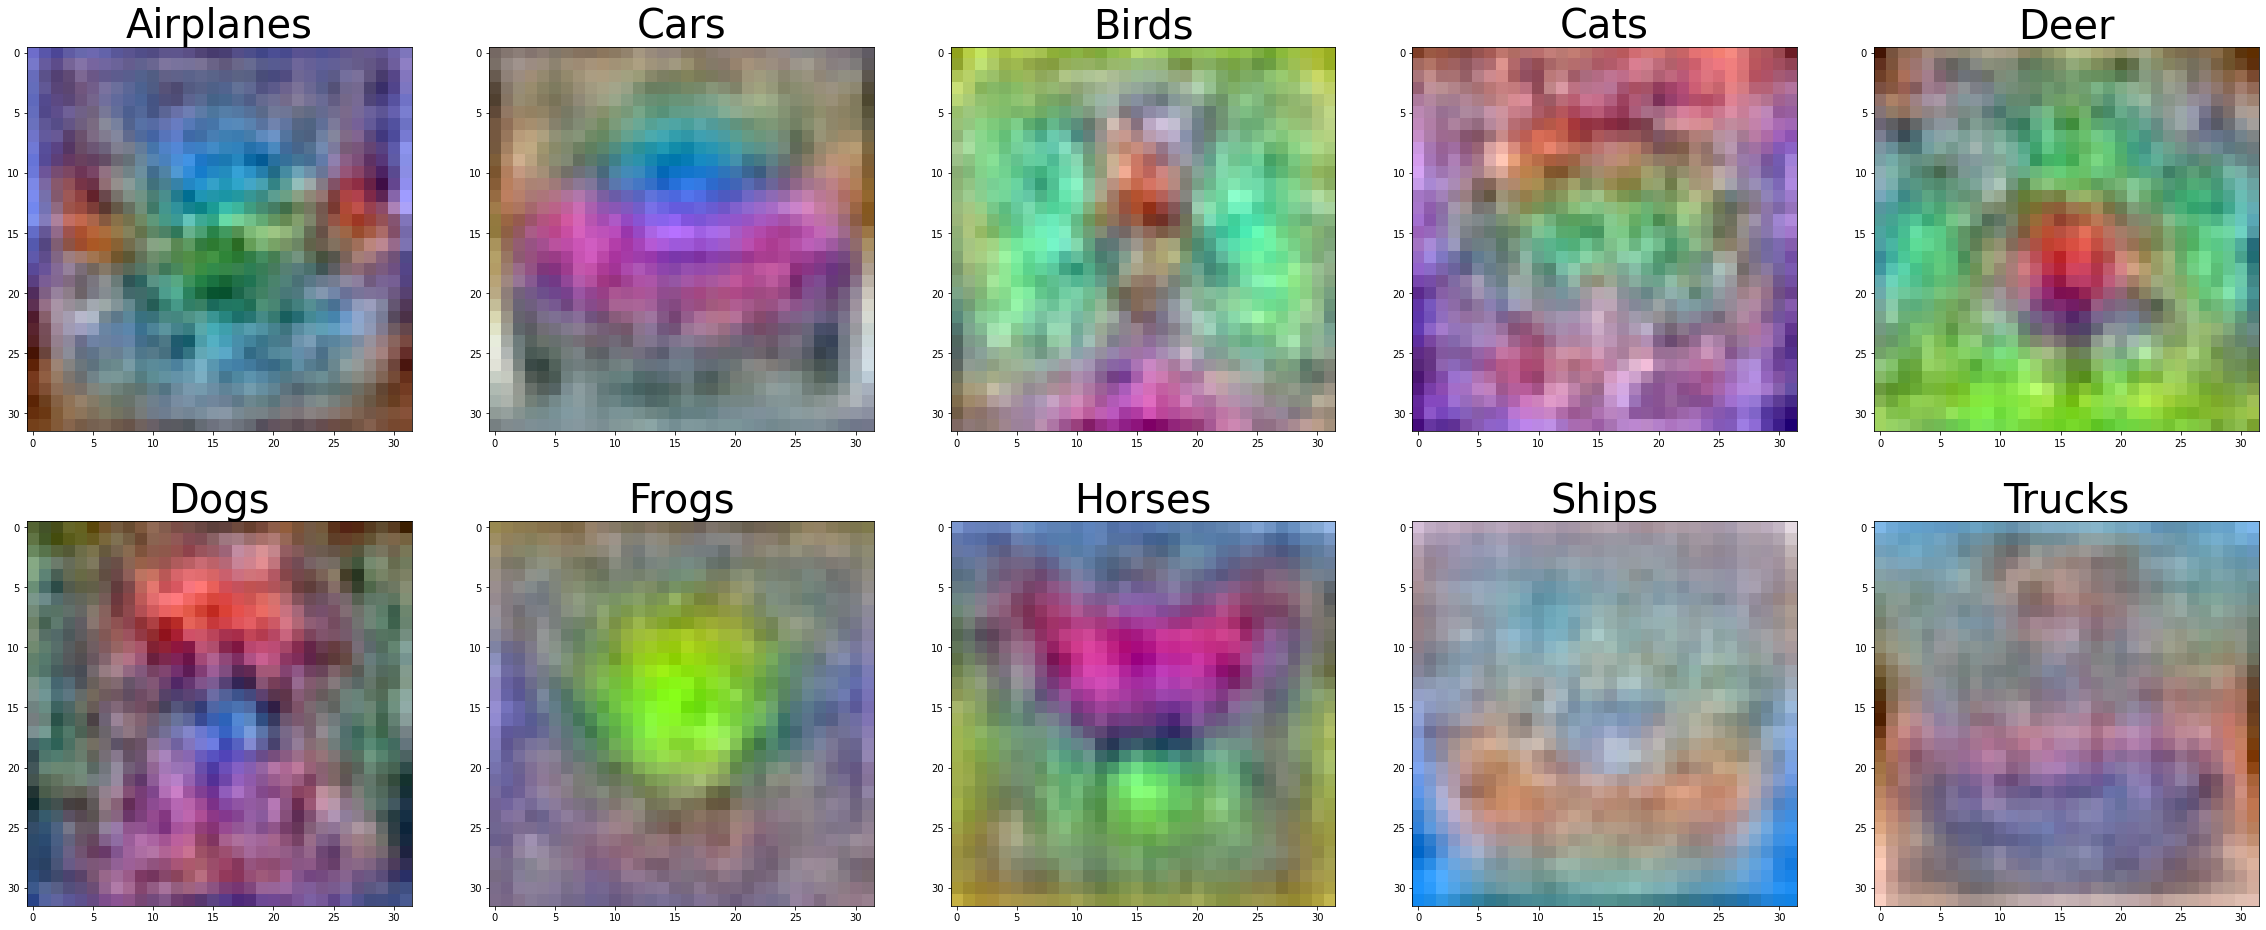

In [116]:
classifiers = []

# Reshape and normalize w1 to obtain classifiers
for i in range(w1.shape[1]):
    img = np.reshape(w1[:,i]*255,(32,32,3))
    classifiers.append(cv.normalize(img, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U))

# Class labels
classes = [['Airplanes','Cars','Birds','Cats','Deer'],['Dogs','Frogs','Horses','Ships','Trucks']]

# Display w1 as images
fig,ax = plt.subplots(2,5,figsize=(40,16))

for i in range(2):
    for j in range(5):
        ax[i,j].set_title(classes[i][j],fontsize= 40)
        ax[i,j].imshow(classifiers[5*i+j],vmin=0,vmax=255)

plt.savefig("Img_a4/LinearClassifiers.tif")
plt.show()

# 2. 2-Layer Neural Network

In [110]:
# Activation for the nn
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [117]:
# Download the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape,'\n')

# Classes
K = len(np.unique(y_train)) 

# Data Parameters
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

# Normalize pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# Covert labels to binary classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Reshape the data
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train reshaped:', x_train.shape)
print('y_train reshaped:',y_train.shape)
print('x_test reshaped:',x_test.shape)
print('y_test reshaped:',y_test.shape)


x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1) 

x_train reshaped: (50000, 3072)
y_train reshaped: (50000, 10)
x_test reshaped: (10000, 3072)
y_test reshaped: (10000, 10)


In [118]:
# Initialize weights
H = 200
w_1 = std*np.random.randn(Din, H)
b_1 = np.zeros((1,H))
w_2 = std*np.random.randn(H, K)
b_2 = np.zeros((1,K))

print("w1 for nn:", w_1.shape)
print("b1 for nn:", b_1.shape)
print("w2 for nn:", w_2.shape)
print("b2 for nn:", b_2.shape)

# Initialize parameters for linear model
iterations = 300
lr = 0.014
lr_decay = 0.999
reg = 5e-6 # Regularization parameter - Lambda

# Initialize lists to store history
loss_history_nn = []
loss_history_nn_test = []
train_acc_history_nn = []
val_acc_history_nn = []


w1 for nn: (3072, 200)
b1 for nn: (1, 200)
w2 for nn: (200, 10)
b2 for nn: (1, 10)


In [113]:
# Implement 2-layer nn

for t in range(1,iterations+1):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    # Forward pass
    Xi = x_train[indices]
    Yi = y_train[indices]
    
    h = sigmoid(np.matmul(Xi,w_1)+b_1)
    y_nn = ForwardProp(h,w_2,b_2)

    loss = LinearLoss(y_nn,Yi,w_1,reg,w_2)

    if not(t%10):print('Iterations :',t,'---------- loss',loss)
    
        # Test set -----------------------------------------------
    h_t = sigmoid(np.matmul(x_test,w_1)+b_1)
    y_pt = ForwardProp(h_t,w_2,b_2)

    # Calculate test loss for each iteration
    loss_t = LinearLoss(y_pt,y_test,w_1,reg,w_2)
    # --------------------------------------------------------

    # Update history
    loss_history_nn.append(loss)
    loss_history_nn_test.append(loss_t)
    train_acc_history_nn.append(Accuracy(Yi,y_nn))
    val_acc_history_nn.append(Accuracy(y_test,y_pt))

    # Backward pass
    dw1,db1,dw2,db2 = BackProp(Xi,Yi,y_nn,True,w_1,w_2,h) 

    # Perform Gradient Descent
    w_1,b_1,lr = GradDescent(w_1,b_1,dw1,db1,lr,lr_decay)
    lr /= lr_decay
    w_2,b_2,lr = GradDescent(w_2,b_2,dw2,db2,lr,lr_decay)


t : 0 ---------- loss 0.999904575565941


ValueError: operands could not be broadcast together with shapes (3072,10) (3072,200) (3072,10) 

In [ ]:
# Printing accuracies and losses

print("Learning Rate:", lr)
print("Training Set Loss For NN:", loss_history_nn[-1])
print("Test Set Loss For NN:", loss_history_nn_test[-1])
print("Train Accuracy For NN:",train_acc_history_nn[-1])
print("Test Accuracy For NN:",val_acc_history_nn[-1])

In [ ]:
# Visualizing the loss/accuracy variation over iterations

fig,ax = plt.subplots(2,1,figsize=(20,10))

ax[0].plot(loss_history_nn,color="r")
ax[0].plot(loss_history_nn_test,color="b")
ax[0].set_title('Loss Variaton with Iterations',fontsize= 15)
ax[0].legend(['Training Set Loss','Test Set Loss'],fontsize= 15)

ax[1].plot(train_acc_history_nn,color="g")
ax[1].plot(val_acc_history_nn,color="y")
ax[1].set_title('Accuracy Variaton with Iterations',fontsize= 15)
ax[1].legend(['Train Accuracy','Test Accuracy'],fontsize= 15)

plt.savefig("Img_a4/NNHistory.tif")

In [157]:
# Prediction
ac_t = sigmoid(np.matmul(x_test,w_1)+b_1)
y_predic = np.matmul(ac_t,w_2)+b_2

print("Learning rate:", lr)
print("Training set loss:", loss_history[-1])

loss_test = (1/Nte)*np.sum(np.square(y_predic - y_test))
print("Test set loss:", loss_test)

y_predic_in = np.argmax(y_predic,axis=1)
y_test_class = np.argmax(y_test,axis=1)

print("Test Accuracy:", np.sum(y_predic_in==y_test_class)*100/y_test_class.size)

Learning rate: 0.005433502828270419
Training set loss: 0.8999999823415467
Test set loss: 0.8999999823487368
Test Accuracy: 10.05


# 3. Stochastic Gradient Descent

In [ ]:
# Modify the 2-Layer NN Model to carry out stochastic gradient descent

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    # Forward pass
    Xi = x_train[indices]
    Yi = y_train[indices]
    
    h = sigmoid(np.matmul(Xi,w_1)+b_1)
    y_nn = ForwardProp(h,w_2,b_2)

    loss = LinearLoss(y_nn,Yi,w_1,reg,w_2)

    if not(t%10):print('t :',t,'---------- loss',loss)
    
        # Test set -----------------------------------------------
    h_t = sigmoid(np.matmul(x_test,w_1)+b_1)
    y_pt = ForwardProp(h_t,w_2,b_2)

    # Calculate test loss for each iteration
    loss_t = LinearLoss(y_pt,y_test,w_1,reg,w_2)
    # --------------------------------------------------------

    # Update history
    loss_history_nn.append(loss)
    loss_history_nn_test.append(loss_t)
    train_acc_history_nn.append(Accuracy(Yi,y_nn))
    val_acc_history_nn.append(Accuracy(y_test,y_pt))

    # Backward pass
    dw1,db1,dw2,db2 = BackProp(Xi,Yi,y_nn,True,w_1,w_2,h) 

    # Perform Gradient Descent
    w_1,b_1,lr = GradDescent(w_1,b_1,dw1,db1,lr,lr_decay)
    lr /= lr_decay
    w_2,b_2,lr = GradDescent(w_2,b_2,dw2,db2,lr,lr_decay)


In [ ]:
# Initialize weights
H = 200
w_s1 = std*np.random.randn(Din, H)
b_s1 = np.zeros((1,H))
w_s2 = std*np.random.randn(H, K)
b_s2 = np.zeros((1,K))

print("w1 for st:", w_s1.shape)
print("b1 for st:", b_s1.shape)
print("w2 for st:", w_s2.shape)
print("b2 for st:", b_s2.shape)

# Initialize parameters for linear model
iterations = 300
lr = 0.014
lr_decay = 0.999
reg = 5e-6 # Regularization parameter - Lambda

batch_size = 500
per_iter = Ntr//batch_size

# Initialize lists to store history
loss_history_st = []
loss_history_st_test = []
train_acc_history_st = []
val_acc_history_st = []


In [175]:
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    # Forward pass

    Xs = x_train[indices]
    Ys = y_train[indices]

    for iter in range(per_iter):
        batch = Xs[batch_size*iter:batch_size*(iter+1)]
        batchy = Ys[batch_size*iter:batch_size*(iter+1)]    
        ac = sigmoid(np.matmul(batch,w_1)+b_1)
        y_b = np.matmul(ac,w_2)+b_2
        dy = y_b - batchy
        loss = (1/batch_size)*np.sum(np.square(dy)) + np.sum(w_1**2)*reg
        loss_history_st.append(loss)

    
        # Backward pass
        dac = np.matmul(2*dy,w_2.T)/batch_size
        dw1 = np.matmul(batch.T,dac*ac*(1-ac))/batch_size + 2*w_1*reg
        db1 = np.sum(dac*ac*(1-ac),axis=0)/batch_size  

        dw2 = np.matmul(ac.T,2*dy)/batch_size + 2*w_2*reg
        db2 = np.sum(2*dy,axis=0)/batch_size  

        # Perform Gradient Descent
        w_1 -= dw1*lr
        b_1 -= db1*lr
        w_2 -= dw2*lr
        b_2 -= db2*lr
        lr *= lr_decay  

    if not(t%10):print('t :',t,'---------- loss',loss)

t : 0 ---------- loss 0.9008984393065269
t : 10 ---------- loss 0.9010242749428756
t : 20 ---------- loss 0.8998755183687912
t : 30 ---------- loss 0.9001436348757059
t : 40 ---------- loss 0.9002109543043372
t : 50 ---------- loss 0.8999962857309703
t : 60 ---------- loss 0.9000051150120449
t : 70 ---------- loss 0.9000034952564726
t : 80 ---------- loss 0.9000015178841494
t : 90 ---------- loss 0.9000015639762128
t : 100 ---------- loss 0.8999994476612927
t : 110 ---------- loss 0.8999997281218244
t : 120 ---------- loss 0.8999998851480435
t : 130 ---------- loss 0.8999995449923835
t : 140 ---------- loss 0.9000002313405648
t : 150 ---------- loss 0.899999506711902
t : 160 ---------- loss 0.8999999388771533
t : 170 ---------- loss 0.9000000761329955
t : 180 ---------- loss 0.9000003026589055
t : 190 ---------- loss 0.8999995463692197
t : 200 ---------- loss 0.9000002005616976
t : 210 ---------- loss 0.9000007463238083
t : 220 ---------- loss 0.8999996852648459
t : 230 ---------- loss

KeyboardInterrupt: 

# 4. CNN

In [ ]:
from tensorflow.keras import layers,models

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
#converts to catergorical

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K) 
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)



In [ ]:

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

print(model.summary())

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=60,batch_size=50,validation_data=(x_test,y_test))

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])

test_loss, test_acc = model.evaluate(x_test,y_test,verbose=2)
print(test_acc)